# Capstone Project 1 - Preliminary Data Story

In this notebook, I will conduct a high-level investigation the wrangled credit card client default data set.  From this investigation, I will try to draw some inferences and insights and create a preliminary data story.

## Main Question: What features might predict card client default?

To answer this main question, I will answer to the following related questions:

1. Is the proportion of defaults the same for men and women?
2. Is the proportion of defaults the same regardless of level of education?
3. Is the proportion of defaults the same regardless of marital status?
4. Is the proportion of defaults correlated with age?
5. Is the proportion of defaults correlated with credit limit?
6. Is the history of past repayment status predictive of the proportion of defaults?
7. Is the history of credit card bill amount predictive of the proportion of defaults?
8. Is the ratio of ((bill amount - pay amount) / credit limit) predictive of the proportion of defaults?

In [1]:
# Import libraries
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Modify notebook settings
%matplotlib inline
sns.set_style("whitegrid")
pd.options.display.max_columns = 100

### Create path to data file

In [2]:
# Create a variable for the project root directory
proj_root = os.path.join(os.pardir)

# Save path to the wrangled data file
# "dataset_wrangled.csv"
wrangled_data_file = os.path.join(proj_root,
                                "data",
                                "interim",
                                "dataset_wrangled.csv")

### Create path to folder of exhibits for the final report

In [3]:
# Save the path to the folder that will contain 
# the figures for the final report:
# /reports/figures
figures_dir = os.path.join(proj_root,
                                "reports",
                                "figures")

### Read in wrangled data

In [4]:
# Read in the wrangled credit card client default data set.

df_wrangled = pd.read_csv(wrangled_data_file,
                          header=1, 
                          index_col=0)
#df_wrangled.head()

### 1. Is the proportion of defaults the same for men and women?

The data set contains 11888 males and 18112 females.  

There does not seem to be any reason to think that men would be more likely to default than women, or vice versa.

Below, we will check whether the proportion of defaults for men and is roughly the same as the proportion of defaults for women.

In [5]:
# Create a contingency table of 
# gender (male / female) and
# default status (default / non-default)

default_sex_crosstab = pd.crosstab(df_wrangled['default payment next month'], 
                                   df_wrangled['SEX'], 
                                   margins=True,
                                   normalize=False)

# default payment next month:
# 0 = non-default; 1 = default
new_index = {0: 'Non-default', 1: 'Default', }

# SEX: 
# 1 = male; 2 = female
new_columns = {1 : 'Male', 2 : 'Female'}

default_sex_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
default_sex_crosstab

SEX,Male,Female,All
default payment next month,,,
Non-default,9015,14349,23364
Default,2873,3763,6636
All,11888,18112,30000


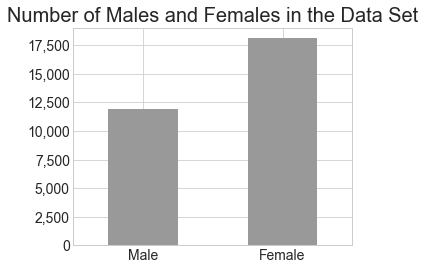

In [6]:
# Plot the number of males and females

fig, ax = plt.subplots(1, 1)

my_colors = ['0.6']

default_sex_crosstab.loc['All'][0:2].plot.bar(figsize=(5,4), 
                                              rot=0, 
                                              fontsize=14,
                                              color=my_colors, 
                                              ax=ax)

plt.title('Number of Males and Females in the Data Set', 
          fontsize=20)

def yaxis_formatter_fn(x, pos):
    return "{:,}".format(int(x))

formatter = FuncFormatter(yaxis_formatter_fn)
ax.yaxis.set_major_formatter(formatter)

ax.xaxis.label.set_visible(False)

plt.show()

In [7]:
# Normalize the contingency table columns
# by dividing each column by the column's total.

default_sex_crosstab_norm =  default_sex_crosstab / default_sex_crosstab.loc['All']
default_sex_crosstab_norm

SEX,Male,Female,All
default payment next month,,,
Non-default,0.758328,0.792237,0.7788
Default,0.241672,0.207763,0.2212
All,1.000000,1.000000,1.0000


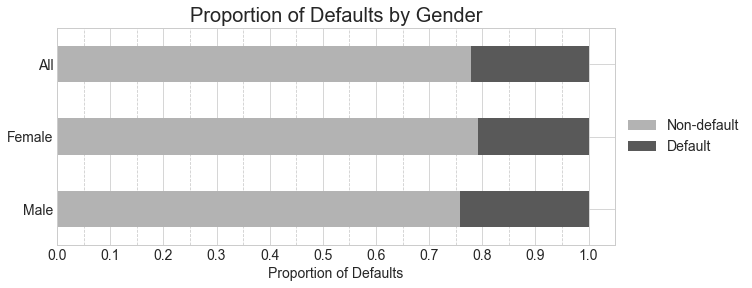

In [8]:
# Plot the proportion of defaults by gender, showing:
#   1. the proportion of defaults for males;
#   2. the proportion of defaults for females; and
#   3. the proportion of defaults for the entire data set.

fig, ax = plt.subplots(1, 1)

my_colors = ['0.7','0.35',]
default_sex_crosstab_norm[0:2].T.plot.barh(stacked=True, 
                                           figsize=(10,4), 
                                           xticks=list(np.linspace(0, 1, 11)),
                                           rot=0, 
                                           fontsize=14,
                                           color=my_colors, 
                                           ax=ax)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14)

ax.xaxis.set_ticks(list(np.linspace(0.05, .95, 10)), minor=True)
ax.grid(b=True, which='minor', color='.8', linestyle='--')

ax.yaxis.label.set_visible(False)


plt.title('Proportion of Defaults by Gender', fontsize=20)
plt.xlabel('Proportion of Defaults', fontsize=14)

plt.show()

#### Observations:

+ For the entire data set, approximately 22.1% of the individuals defaulted.
+ Approximately 24.2% of the males defaulted.
+ Approximately 20.8% of the females defaulted.

The proportion of defaults for men is slightly higher than the proportion of defaults for women.  However, this difference appears to be small and may not be statistically significant.

#### Follow-up points:
+ Conduct a hypothesis test to check if the difference in the proportion of defaults for males and females is statistically significant.

### 2. Is the proportion of defaults the same regardless of level of education?

The data set contains information on the level of educational attainment for each individual.  There are:

+ 10,585 individuals with graduate school educations;
+ 14,030 individuals with university educations;
+ 4,917 individuals with high school educations; and
+ 468 individuals categorized as 'others'.

Below, we will check whether the proportion of defaults for each level of education is roughly the same.  Is there a trend?  Does the proportion of defaults seem to decrease (or increase) as the level of education increases?


One might expect that people with higher degrees tend to earn more than people with lower degrees, all else equal.  Therefore, there might be reason to think that the proportion of defaults would decrease as the level of education increases.

On the other hand, there are some countervailing forces that might make some people with higher degrees more likely to default, namely:
1. People with higher degrees may be saddled with more more student debt.
2. People with higher degrees may have foregone earnings for many years while pursuing their degrees.

We will look at the data to see if there appears to be any relationship between the proportion of defaults and the level of education.

In [9]:
# Create a contingency table of 
# education (Graduate school / University / High school /Others) and
# default status (default / non-default)

default_edu_crosstab = pd.crosstab(df_wrangled['default payment next month'], 
                                   df_wrangled['EDUCATION'], 
                                   margins=True,
                                   normalize=False)

# default payment next month:
# 0 = non-default; 1 = default
new_index = {0: 'Non-default', 1: 'Default', }

# EDUCATION: 
# 1 = graduate school; 2 = university; 3 = high school; 4 = others.
new_columns = {1 : 'Graduate school', 
               2 : 'University', 
               3 : 'High school', 
               4 : 'Others'}

default_edu_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
default_edu_crosstab

EDUCATION,Graduate school,University,High school,Others,All
default payment next month,,,,,
Non-default,8549,10700,3680,435,23364
Default,2036,3330,1237,33,6636
All,10585,14030,4917,468,30000


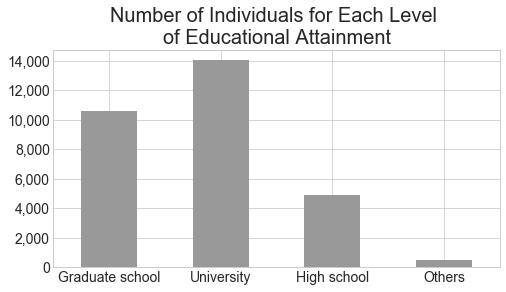

In [10]:
# Plot the number of individuals for 
# each level of educational attainment.

fig, ax = plt.subplots(1, 1)

my_colors = ['0.6']

default_edu_crosstab.loc['All'][0:4].plot.bar(figsize=(8,4), 
                                              rot=0, 
                                              fontsize=14,
                                              color=my_colors, 
                                              ax=ax)

plt.title('Number of Individuals for Each Level \nof Educational Attainment', 
          fontsize=20)

def yaxis_formatter_fn(x, pos):
    return "{:,}".format(int(x))

formatter = FuncFormatter(yaxis_formatter_fn)
ax.yaxis.set_major_formatter(formatter)

ax.xaxis.label.set_visible(False)

plt.show()

In [11]:
# Normalize the contingency table columns
# by dividing each column by the column's total.

default_edu_crosstab_norm =  default_edu_crosstab / default_edu_crosstab.loc['All']
default_edu_crosstab_norm

EDUCATION,Graduate school,University,High school,Others,All
default payment next month,,,,,
Non-default,0.807652,0.762651,0.748424,0.929487,0.7788
Default,0.192348,0.237349,0.251576,0.070513,0.2212
All,1.000000,1.000000,1.000000,1.000000,1.0000


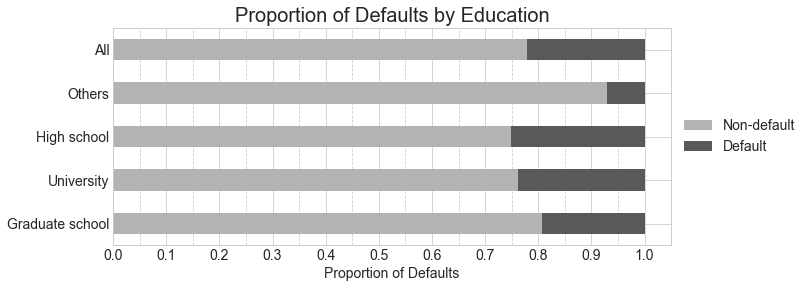

In [12]:
# Plot the proportion of defaults by level of education, showing:
#   1. the proportion of defaults for individuals with high school education;
#   2. the proportion of defaults for individuals with univeresity education;
#   3. the proportion of defaults for individuals with graduate school education;
#   4. the proportion of defaults for individuals categorized as 'others';
#   5. the proportion of defaults for the entire data set.

fig, ax = plt.subplots(1, 1)

my_colors = ['0.7','0.35',]
default_edu_crosstab_norm[0:2].T.plot.barh(stacked=True, 
                                           figsize=(10,4), 
                                           xticks=list(np.linspace(0, 1, 11)),
                                           rot=0, 
                                           fontsize=14,
                                           color=my_colors, 
                                           ax=ax)

lgd = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14)

ax.xaxis.set_ticks(list(np.linspace(0.05, .95, 10)), minor=True)
ax.grid(b=True, which='minor', color='.8', linestyle='--')

ax.yaxis.label.set_visible(False)

plt.title('Proportion of Defaults by Education', fontsize=20)
plt.xlabel('Proportion of Defaults', fontsize=14)


# figure file_name
fig_file_name = 'EDA_Defaults_by_EDU'

# figure file_path
fig_path = os.path.join(figures_dir,
                        fig_file_name)

# Save the figure
plt.savefig(fig_path, dpi = 300, bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()

#### Observations:

+ The proportion of defaults seems to decrease as the level of education increases.

#### Follow-up points:
+ Conduct a hypothesis test to check if the differences in the proportion of defaults for each level of education is statistically significant.

### 3. Is the proportion of defaults the same regardless of marital status?

The data set contains information on the marital status of each individual.  There are:

+ 13,659 married individuals;
+ 15,964 single individuals;
+ 323 divorced individuals;
+ 54 individuals categorized as 'others'.

Below, we will check whether the proportion of defaults for each of these groups is roughly the same.  

One might expect that divorced individuals would be more likely to default, because:
+ The divorce process can inflict enormous legal expense;
+ Divorced individuals may have larger housing costs than married couples, since divorced individuals can no longer save on housing expenses through cohabitation with their (former) spouse.

In [13]:
# Create a contingency table of 
# marital status (Married / Single / Divorce / Others and
# default status (default / non-default)

default_mar_crosstab = pd.crosstab(df_wrangled['default payment next month'], 
                                   df_wrangled['MARRIAGE'], 
                                   margins=True,
                                   normalize=False)

# default payment next month:
# 0 = non-default; 1 = default
new_index = {0: 'Non-default', 1: 'Default', }

# MARRIAGE:
# 1 = married; 2 = single; 3 = divorce; 0=others.
new_columns = {1 : 'Married', 
               2 : 'Single', 
               3 : 'Divorce', 
               0 : 'Others'}

default_mar_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
default_mar_crosstab

MARRIAGE,Others,Married,Single,Divorce,All
default payment next month,,,,,
Non-default,49,10453,12623,239,23364
Default,5,3206,3341,84,6636
All,54,13659,15964,323,30000


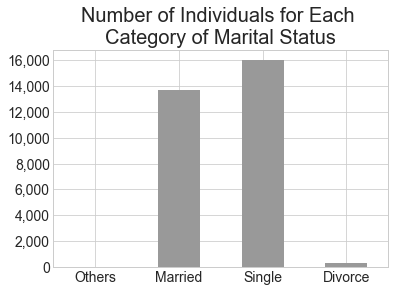

In [14]:
# Plot the number of individuals for 
# each category of marital status.

fig, ax = plt.subplots(1, 1)

my_colors = ['0.6']

default_mar_crosstab.loc['All'][0:4].plot.bar(figsize=(6,4), 
                                              rot=0, 
                                              fontsize=14,
                                              color=my_colors, 
                                              ax=ax)

plt.title('Number of Individuals for Each \nCategory of Marital Status', 
          fontsize=20)

def yaxis_formatter_fn(x, pos):
    return "{:,}".format(int(x))

formatter = FuncFormatter(yaxis_formatter_fn)
ax.yaxis.set_major_formatter(formatter)

ax.xaxis.label.set_visible(False)

plt.show()

In [15]:
# Normalize the contingency table columns
# by dividing each column by the column's total.

default_mar_crosstab_norm =  default_mar_crosstab / default_mar_crosstab.loc['All']
default_mar_crosstab_norm

MARRIAGE,Others,Married,Single,Divorce,All
default payment next month,,,,,
Non-default,0.907407,0.765283,0.790717,0.739938,0.7788
Default,0.092593,0.234717,0.209283,0.260062,0.2212
All,1.000000,1.000000,1.000000,1.000000,1.0000


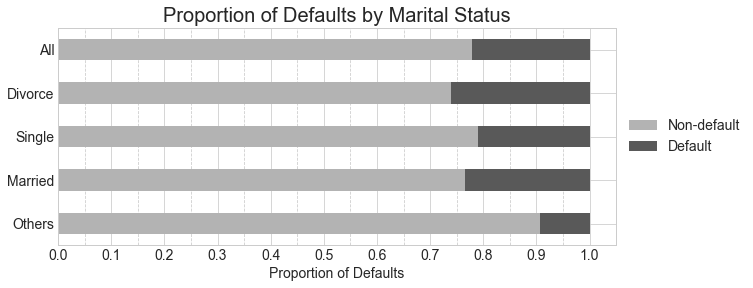

In [16]:
# Plot the proportion of defaults by marital status, showing:
#   1. the proportion of defaults for single individuals;
#   2. the proportion of defaults for married individuals;
#   3. the proportion of defaults for divorced individuals;
#   4. the proportion of defaults for individuals categorized as 'others';
#   5. the proportion of defaults for the entire data set.

fig, ax = plt.subplots(1, 1)

my_colors = ['0.7','0.35',]
default_mar_crosstab_norm[0:2].T.plot.barh(stacked=True, 
                                           figsize=(10,4), 
                                           xticks=list(np.linspace(0, 1, 11)),
                                           rot=0, 
                                           fontsize=14,
                                           color=my_colors, 
                                           ax=ax)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14)

ax.xaxis.set_ticks(list(np.linspace(0.05, .95, 10)), minor=True)
ax.grid(b=True, which='minor', color='.8', linestyle='--')

ax.yaxis.label.set_visible(False)

plt.title('Proportion of Defaults by Marital Status', fontsize=20)
plt.xlabel('Proportion of Defaults', fontsize=14)

plt.show()

#### Observations:

+ The proportion of defaults seems to be highest for divorced individuals and lowest for single individuals (we are ignoring "Others").

The relatively high default rate among divorced individuals fits with our intuition that divorced individuals would be more likely to default, since:
+ The divorce process can inflict enormous legal expense;
+ Divorced individuals may have larger housing costs than married couples, since divorced individuals can no longer save on housing expenses through cohabitation with their (former) spouse.

#### Follow-up points:
+ Conduct a hypothesis test to check if the differences in the proportion of defaults for each category of matiral status is statistically significant.

### 4. Is the proportion of defaults correlated with age?

Below, we will check whether the proportion of defaults changes with age.

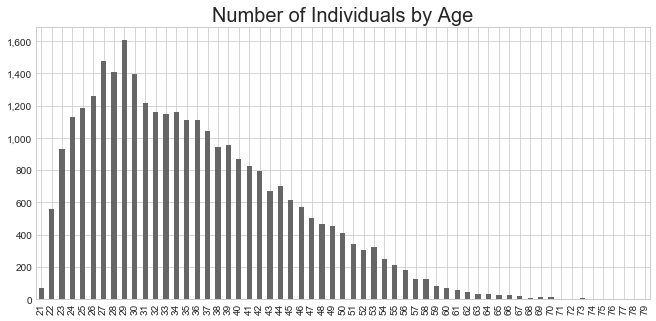

In [17]:
# Plot the number of individuals by age.

# Create series of the number of individuals by age.
age_count = df_wrangled['AGE'].value_counts().sort_index(ascending=True)

# Fill in missing age counts with zeros.
for i in list(range(age_count.index.min(), age_count.index.max()+1)):
    if i not in age_count.index:
        s = pd.Series([0], index=[i])
        age_count = age_count.append(s)

age_count.sort_index(ascending=True, inplace=True)

# Plot the Series

fig, ax = plt.subplots(1, 1)

my_colors = ['0.4']

age_count.plot.bar(figsize=(11,5), 
                   rot=90, 
                   fontsize=10,
                   color=my_colors, 
                   ax=ax)

def yaxis_formatter_fn(x, pos):
    return "{:,}".format(int(x))

formatter = FuncFormatter(yaxis_formatter_fn)
ax.yaxis.set_major_formatter(formatter)

ax.xaxis.label.set_visible(False)

plt.title('Number of Individuals by Age', 
          fontsize=20)
plt.xlabel('Age', fontsize=14)

plt.show()

In [18]:
# Create a contingency table of age and
# default status (default / non-default)

default_age_crosstab = pd.crosstab(df_wrangled['default payment next month'], 
                                   df_wrangled['AGE'], 
                                   margins=True,
                                   normalize=False)

# default payment next month:
# 0 = non-default; 1 = default
new_index = {0: 'Non-default', 1: 'Default', }

default_age_crosstab.rename(index=new_index, inplace=True)
default_age_crosstab

AGE,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,79,All
default payment next month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Non-default,53,391,684,827,884,1003,1164,1123,1292,1121,988,933,931,931,887,854,812,750,755,683,639,609,520,538,501,413,381,362,333,310,252,226,251,191,152,129,95,91,62,44,35,37,23,22,19,18,11,4,12,8,3,2,1,1,2,1,23364
Default,14,169,247,300,302,253,313,286,313,274,229,225,215,231,226,254,229,194,199,187,185,185,150,162,116,157,120,104,119,101,88,78,74,56,57,49,27,31,21,23,21,7,8,9,5,7,5,1,3,2,0,1,3,0,1,0,6636
All,67,560,931,1127,1186,1256,1477,1409,1605,1395,1217,1158,1146,1162,1113,1108,1041,944,954,870,824,794,670,700,617,570,501,466,452,411,340,304,325,247,209,178,122,122,83,67,56,44,31,31,24,25,16,5,15,10,3,3,4,1,3,1,30000


In [19]:
# Normalize the contingency table columns
# by dividing each column by the column's total.

default_age_crosstab_norm =  default_age_crosstab / default_age_crosstab.loc['All']
default_age_crosstab_norm

AGE,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,79,All
default payment next month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Non-default,0.791045,0.698214,0.734694,0.733807,0.745363,0.798567,0.788084,0.797019,0.804984,0.803584,0.811832,0.805699,0.812391,0.801205,0.796945,0.770758,0.780019,0.794492,0.791405,0.785057,0.775485,0.767003,0.776119,0.768571,0.811994,0.724561,0.760479,0.776824,0.736726,0.754258,0.741176,0.743421,0.772308,0.773279,0.727273,0.724719,0.778689,0.745902,0.746988,0.656716,0.625,0.840909,0.741935,0.709677,0.791667,0.72,0.6875,0.8,0.8,0.8,1.0,0.666667,0.25,1.0,0.666667,1.0,0.7788
Default,0.208955,0.301786,0.265306,0.266193,0.254637,0.201433,0.211916,0.202981,0.195016,0.196416,0.188168,0.194301,0.187609,0.198795,0.203055,0.229242,0.219981,0.205508,0.208595,0.214943,0.224515,0.232997,0.223881,0.231429,0.188006,0.275439,0.239521,0.223176,0.263274,0.245742,0.258824,0.256579,0.227692,0.226721,0.272727,0.275281,0.221311,0.254098,0.253012,0.343284,0.375,0.159091,0.258065,0.290323,0.208333,0.28,0.3125,0.2,0.2,0.2,0.0,0.333333,0.75,0.0,0.333333,0.0,0.2212
All,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,1.00,1.0000,1.0,1.0,1.0,1.0,1.000000,1.00,1.0,1.000000,1.0,1.0000


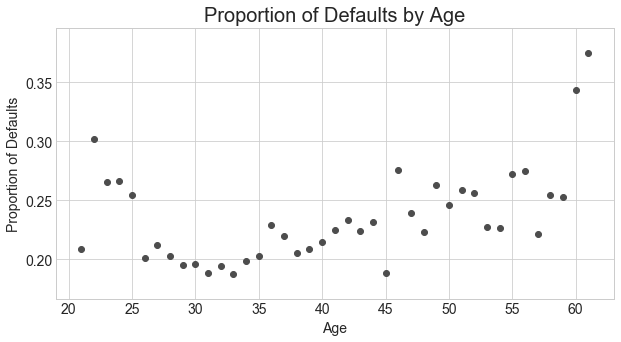

In [20]:
# Plot the proportion of defaults by age, but only
# for ages with at least 50 observations.

my_df = df_wrangled.groupby(['AGE', 
                             'default payment next month']).size().unstack()

# Filter out ages with fewer than 50 observations.
my_df = my_df[my_df.sum(axis=1)>50]

# Calculate proportions
my_df = my_df.div(my_df.sum(axis=1), axis='index')

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10,5))

my_colors = ['0.3']

ax.scatter(x=my_df.index,
           y=my_df[1], 
           color=my_colors)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

plt.title('Proportion of Defaults by Age', fontsize=20)
plt.ylabel('Proportion of Defaults', fontsize=14)
plt.xlabel('Age', fontsize=14)

# figure file_name
fig_file_name = 'EDA_Defaults_by_Age'

# figure file_path
fig_path = os.path.join(figures_dir,
                        fig_file_name)

# Save the figure
plt.savefig(fig_path, dpi = 300)

plt.show()

#### Observations:

+ The proportion of defaults seems to be non-linearly related with age.
+ The proportion of defaults seems to decrease from the early 20s to the early 30s.
+ The proportion of defaults seems to increase from the early 30s onward.

#### Follow-up points:
+ Conduct a logistic regression where age is the predictor variable and default status is the target variable.

### 5. Is the proportion of defaults correlated with credit limit?

Below, we will check whether the proportion of defaults changes with credit limit.

In our data set the credit limit variable is defined as: 

"[The amount] of the given credit [denominated in Taiwan New Dollars]: it includes both the individual consumer credit and his/her family (supplementary) credit." 

In [21]:
# Calculate summary statistics for credit limit.

df_wrangled['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

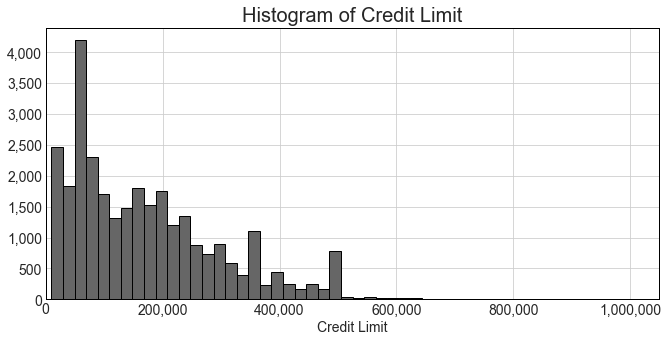

In [22]:
# Plot the a histogram of the number of individuals 
# in each credit limit bin.

fig, ax = plt.subplots(1, 1, figsize=(11,5))

my_colors = ['0.4']

df_wrangled['LIMIT_BAL'].hist(bins=50,
                              color=my_colors,
                              ax=ax, 
                              ec='k',
                              lw=1)

ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

def yaxis_formatter_fn(x, pos):
    return "{:,}".format(int(x))

formatter = FuncFormatter(yaxis_formatter_fn)
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for spine in ax.spines.values():
    spine.set_edgecolor('k')

plt.title('Histogram of Credit Limit', 
      fontsize=20)
plt.xlabel('Credit Limit', fontsize=14)

plt.show()

In [23]:
# Define a generator that yields a range of floating point numbers.
# This will be used for binning below.

def float_range(start, stop, step=1.0):
    '''Generator that yields a range of floating point numbers'''
    while start < stop:
        yield start
        start +=step        

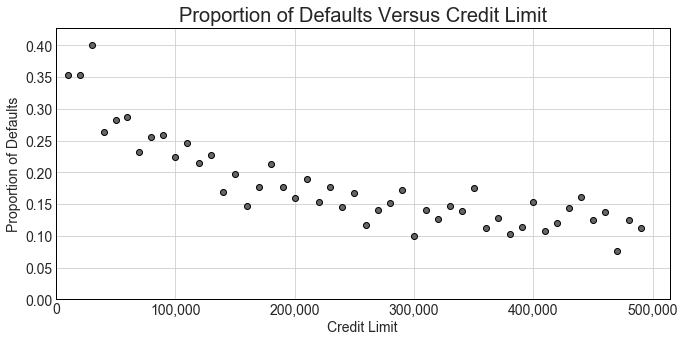

In [24]:
# Plot the proportion of defaults for each 
# credit limit bin.

# Create a list to bin credit limit observations
# The bin size is 10,000 Taiwan New Dollars.

step = 10000
start = round((df_wrangled['LIMIT_BAL'].min()), -4)
stop = round((df_wrangled['LIMIT_BAL'].max() + step), -4)
        
bins = []
for i in float_range(start, stop, step):
    bins.append(round(i,1))

group_names = bins[0:(len(bins)-1)]
group_names

# Bin the data

df_wrangled_copy = df_wrangled.copy()

categories = pd.cut(df_wrangled_copy['LIMIT_BAL'], 
                    bins=bins, 
                    labels=group_names)

df_wrangled_copy['LIMIT_BAL_BINNED'] = categories

my_df = df_wrangled_copy.groupby(['LIMIT_BAL_BINNED',
                                    'default payment next month']).size().unstack()

# Require at least 50 total observations per age
my_df = my_df[my_df.sum(axis=1)>50]

my_df = my_df.div(my_df.sum(axis=1), axis='index')
my_df.sort_index(ascending=False, inplace=True)

# Plot 

fig, ax = plt.subplots(1, 1, figsize=(11,5))

my_colors = ['0.4']

plt.scatter(x=my_df.index, y=my_df[1],
            c=my_colors,  
            edgecolors='k', 
            linewidths=1)

ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

def yaxis_formatter_fn(x, pos):
    return "{:,}".format(int(x))

formatter = FuncFormatter(yaxis_formatter_fn)
ax.xaxis.set_major_formatter(formatter)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for spine in ax.spines.values():
    spine.set_edgecolor('k')

plt.title('Proportion of Defaults Versus Credit Limit', 
          fontsize=20)    
plt.ylabel('Proportion of Defaults', fontsize=14)
plt.xlabel('Credit Limit', fontsize=14)


# figure file_name
fig_file_name = 'EDA_Defaults_by_Credit_Limit'

# figure file_path
fig_path = os.path.join(figures_dir,
                        fig_file_name)

# Save the figure
plt.savefig(fig_path, dpi = 300)

plt.show()

#### Observations:

+ The proportion of defaults seems to be negatively correlated with credit limit.

Generally, only the most credit-worthy customers are eligible for increases in their credit limits.  Credit card companies appear to be doing a good job at due diligence.  Low credit limits are allowed for the least credit-worthy, and  high credit limits are allowed for the most credit-worthy.

#### Follow-up points:
+ Conduct a logistic regression where credit limit is the predictor variable and default status is the target variable.

### 6. Is the history of past repayment status predictive of the proportion of defaults?

For each observation, the data set contains payment records for the past 6 months (from April to September, 2005). There is a feature variable for each month. The variable can take on any integer value within the range of -2 to 9, where each integer stands for the following categories:

+ -2: No consumption; 
+ -1: Paid in full; 
+ 0: The use of revolving credit; 
+ 1: payment delay for one month; 
+ 2: payment delay for two months;
+ . . .; 
+ 8: payment delay for eight months; 
+ 9: payment delay for nine months and above.

Below, we will investigate how the proportion of defaults might be related to the history of past repayment status.

To do this, we do the following:

1. For each month, group observations by repayment status categories (-2, -1, ..., 8, 9);
2. Calculate of these groups, calculate the proportion of observations that ended up defaulting;
3. Plot the proportion of defaults for each month/repayment status combination.

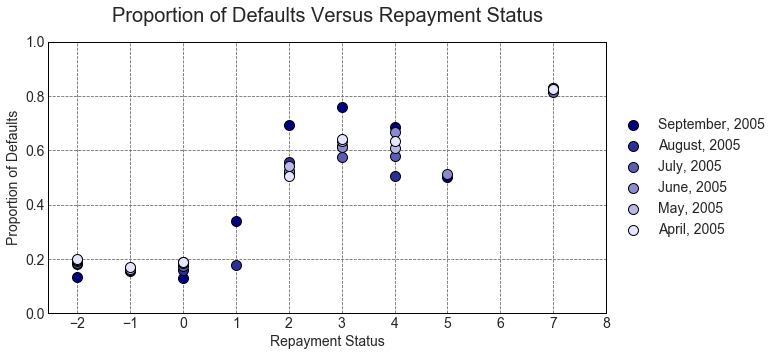

In [25]:
pay_list =['PAY_1',  'PAY_2',  'PAY_3',  'PAY_4',  'PAY_5',  'PAY_6']


label_dict ={'PAY_1': 'September, 2005', 
             'PAY_2': 'August, 2005', 
             'PAY_3': 'July, 2005', 
             'PAY_4': 'June, 2005',  
             'PAY_5': 'May, 2005',  
             'PAY_6': 'April, 2005'}

pay_dfs = {}

for item in pay_list:
    pay_dfs[item] = df_wrangled.groupby([item, 'default payment next month']).size().unstack()
    # Require at least 50 total observations
    
    pay_dfs[item] = pay_dfs[item][pay_dfs[item].sum(axis=1)>25]
    
    # Calculate proportions
    pay_dfs[item] = pay_dfs[item].div(pay_dfs[item].sum(axis=1), axis='index')
    pay_dfs[item].sort_index(ascending=False, inplace=True)
        
# plot

sns.set_palette(sns.light_palette("navy", reverse=True))

fig, ax = plt.subplots(1, 1, figsize=(10,5))

for item in pay_list:
    ax.scatter(x=pay_dfs[item].index, 
               y=pay_dfs[item][1],
               label=label_dict.get(item),
               s=100, 
               edgecolor='k', 
               lw=1)          
    
ax.set_ylim([0, 1])

ticks = [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]#, 9]
plt.xticks(ticks, rotation=0)
#plt.xticks(x, labels, rotation='vertical')

ax.xaxis.set_ticks(ticks=ticks, minor=False)

ax.grid(b=True, which='major', color='0.4', linestyle='--')

lgd = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for spine in ax.spines.values():
    spine.set_edgecolor('k')
        
sns.set_palette(sns.light_palette("navy", reverse=True))
        
#plt.title('Proportion of Defaults Versus Repayment Status', 
#          fontsize=20)  

plt.title('Proportion of Defaults Versus Repayment Status', 
          fontsize=20,
          y = 1.05) 

plt.ylabel('Proportion of Defaults', fontsize=14)
plt.xlabel('Repayment Status', fontsize=14)


# figure file_name
fig_file_name = 'EDA_Defaults_by_Repayment_Status'

# figure file_path
fig_path = os.path.join(figures_dir,
                        fig_file_name)

# Save the figure
plt.savefig(fig_path, dpi = 300, bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()

#### Observations:

+ the proportion of defaults for observations with payment delay for 2 or more months are much higher than the other observations.

### 7. Is the history of credit card bill amount predictive of the proportion of defaults?

For each observation, the data set contains bill amounts for the past 6 months (from April to September, 2005). 

Below, we will investigate how the proportion of defaults might be related to the history of past bill amounts.

To do this, we do the following:

1. Calculate the ratio of (bill amount / credit limit);
2. For each month, bin these ratios of (bill amount / credit limit) using a bin size of 0.1;
3. Plot the proportion of defaults for each month/bin combination.

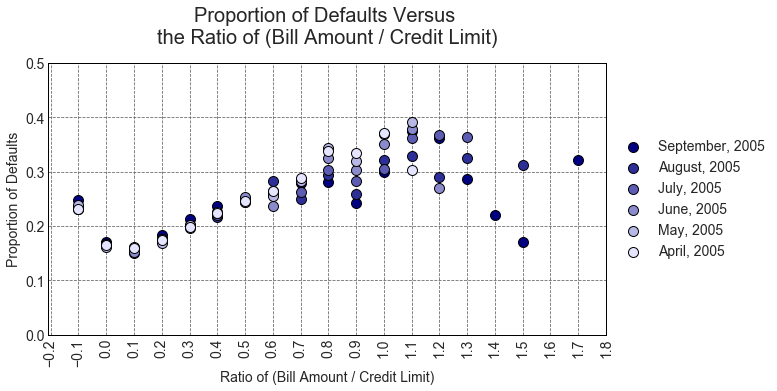

In [26]:
bill_amt_list =['BILL_AMT1', 
                'BILL_AMT2', 
                'BILL_AMT3', 
                'BILL_AMT4', 
                'BILL_AMT5', 
                'BILL_AMT6']

label_dict ={'BILL_AMT1': 'September, 2005',  
             'BILL_AMT2': 'August, 2005',
             'BILL_AMT3': 'July, 2005', 
             'BILL_AMT4': 'June, 2005',  
             'BILL_AMT5': 'May, 2005', 
             'BILL_AMT6': 'April, 2005'}

c_dict ={'BILL_AMT1': 'BILL_AMT1_OVER_LIMIT_BAL',  
         'BILL_AMT2': 'BILL_AMT2_OVER_LIMIT_BAL', 
         'BILL_AMT3': 'BILL_AMT3_OVER_LIMIT_BAL',  
         'BILL_AMT4': 'BILL_AMT4_OVER_LIMIT_BAL', 
         'BILL_AMT5': 'BILL_AMT5_OVER_LIMIT_BAL',  
         'BILL_AMT6': 'BILL_AMT6_OVER_LIMIT_BAL'}

c_dict_binned ={'BILL_AMT1': 'BILL_AMT1_OVER_LIMIT_BAL_BINNED',  
                'BILL_AMT2': 'BILL_AMT2_OVER_LIMIT_BAL_BINNED', 
                'BILL_AMT3': 'BILL_AMT3_OVER_LIMIT_BAL_BINNED',  
                'BILL_AMT4': 'BILL_AMT4_OVER_LIMIT_BAL_BINNED', 
                'BILL_AMT5': 'BILL_AMT5_OVER_LIMIT_BAL_BINNED',  
                'BILL_AMT6': 'BILL_AMT6_OVER_LIMIT_BAL_BINNED'}

df_wrangled_copy = df_wrangled.copy()

for item in bill_amt_list:
    df_wrangled_copy[c_dict.get(item)] = df_wrangled_copy[item].div(df_wrangled_copy['LIMIT_BAL'],
                                                                              axis='index')

min_set = set()
max_set = set()

for item in bill_amt_list:
    min_set.add(df_wrangled_copy[c_dict.get(item)].min())
    max_set.add(df_wrangled_copy[c_dict.get(item)].max())
    
step = 0.1
    
start = round((min(min_set) - step), 1)
stop = round((max(max_set) + step), 1)

bins = []
for i in float_range(start, stop, step):
    bins.append(round(i,1))

group_names = bins[0:(len(bins)-1)]
group_names

for item in bill_amt_list:
    categories = pd.cut(df_wrangled_copy[c_dict.get(item)], 
                        bins=bins, 
                        labels=group_names)
    df_wrangled_copy[c_dict_binned.get(item)] = categories

bill_amt_dfs = {}

for item in bill_amt_list:
    bill_amt_dfs[item] = df_wrangled_copy.groupby([c_dict_binned.get(item), 
                                                   'default payment next month']).size().unstack()
    # Require at least 50 total observations
    
    bill_amt_dfs[item] = bill_amt_dfs[item][bill_amt_dfs[item].sum(axis=1)>25]
    
    # Calculate proportions
    bill_amt_dfs[item] = bill_amt_dfs[item].div(bill_amt_dfs[item].sum(axis=1), axis='index')
    bill_amt_dfs[item].sort_index(ascending=False, inplace=True)
        
# plot

sns.set_palette(sns.light_palette("navy", reverse=True))

fig, ax = plt.subplots(1, 1, figsize=(10,5))

for item in bill_amt_list:
    ax.scatter(x=bill_amt_dfs[item].index, 
               y=bill_amt_dfs[item][1],
               label=label_dict.get(item),
               s=100, 
               edgecolor='k', 
               lw=1)          
    
ax.set_ylim([0, 0.5])

xmin, xmax = ax.get_xlim()

step = 0.1
start = round((xmin), 1)
stop = round((xmax + step), 1)

ticks = []
for i in float_range(start, stop, step):
    ticks.append(round(i,1))

plt.xticks(ticks, rotation=90)

ax.grid(b=True, which='major', color='0.4', linestyle='--')

lgd = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for spine in ax.spines.values():
    spine.set_edgecolor('k')
        
sns.set_palette(sns.light_palette("navy", reverse=True))
        
#plt.title('Proportion of Defaults Versus \nthe Ratio of (Bill Amount / Credit Limit)', 
#          fontsize=20)    

plt.title('Proportion of Defaults Versus \nthe Ratio of (Bill Amount / Credit Limit)', 
          fontsize=20,
          y = 1.05)   

plt.ylabel('Proportion of Defaults', fontsize=14)
plt.xlabel('Ratio of (Bill Amount / Credit Limit)', fontsize=14)


# figure file_name
fig_file_name = 'EDA_Defaults_by_ratio_bacl'

# figure file_path
fig_path = os.path.join(figures_dir,
                        fig_file_name)

# Save the figure
plt.savefig(fig_path, dpi = 300, bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()

#### Observations:

+ The proportion of defaults seems to be positively correlated with the ratio of (bill amount / credit limit).

#### Follow-up points:
+ Conduct a logistic regression where the ratio of (bill amount / credit limit) is the predictor variable and default status is the target variable.

### 8. Is the ratio of ((bill amount - pay amount) / credit limit) predictive of the proportion of defaults?

To investigate this relationship, we do the following:

1. Calculate the ratio of ((bill amount - pay amount) / credit limit);
2. For each month, bin these ratios of ((bill amount - pay amount) / credit limit) using a bin size of 0.1;
3. Plot the proportion of defaults for each month/bin combination.

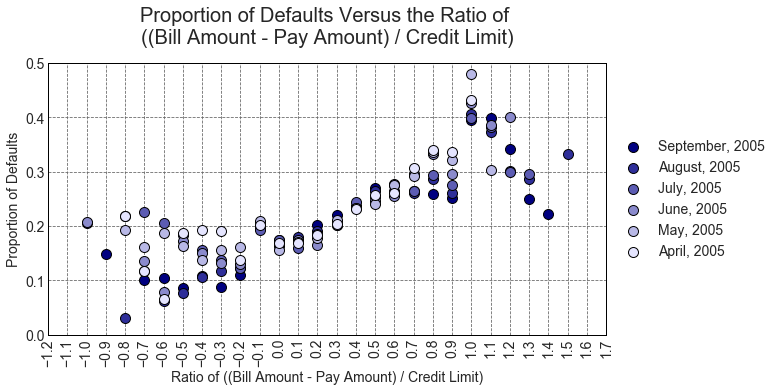

In [27]:
bill_amt_list =['BILL_AMT1', 
                'BILL_AMT2', 
                'BILL_AMT3', 
                'BILL_AMT4', 
                'BILL_AMT5', 
                'BILL_AMT6']

bill_pay_dict ={'BILL_AMT1': 'PAY_AMT1',  
                'BILL_AMT2': 'PAY_AMT2', 
                'BILL_AMT3': 'PAY_AMT3',  
                'BILL_AMT4': 'PAY_AMT4',  
                'BILL_AMT5': 'PAY_AMT5', 
                'BILL_AMT6': 'PAY_AMT6'}

label_dict ={'BILL_AMT1': 'September, 2005',  
             'BILL_AMT2': 'August, 2005',
             'BILL_AMT3': 'July, 2005', 
             'BILL_AMT4': 'June, 2005',  
             'BILL_AMT5': 'May, 2005', 
             'BILL_AMT6': 'April, 2005'}

c_dict ={'BILL_AMT1': 'BILL_AMT1_OVER_LIMIT_BAL',  
         'BILL_AMT2': 'BILL_AMT2_OVER_LIMIT_BAL', 
         'BILL_AMT3': 'BILL_AMT3_OVER_LIMIT_BAL',  
         'BILL_AMT4': 'BILL_AMT4_OVER_LIMIT_BAL', 
         'BILL_AMT5': 'BILL_AMT5_OVER_LIMIT_BAL',  
         'BILL_AMT6': 'BILL_AMT6_OVER_LIMIT_BAL'}

c_dict_binned ={'BILL_AMT1': 'BILL_AMT1_OVER_LIMIT_BAL_BINNED',  
                'BILL_AMT2': 'BILL_AMT2_OVER_LIMIT_BAL_BINNED', 
                'BILL_AMT3': 'BILL_AMT3_OVER_LIMIT_BAL_BINNED',  
                'BILL_AMT4': 'BILL_AMT4_OVER_LIMIT_BAL_BINNED', 
                'BILL_AMT5': 'BILL_AMT5_OVER_LIMIT_BAL_BINNED',  
                'BILL_AMT6': 'BILL_AMT6_OVER_LIMIT_BAL_BINNED'}

df_wrangled_copy = df_wrangled.copy()

for item in bill_amt_list:
    df_wrangled_copy[c_dict.get(item)] = (df_wrangled_copy[item] - df_wrangled_copy[bill_pay_dict.get(item)]).div(df_wrangled_copy['LIMIT_BAL'],
                                                                                                                  axis='index')

min_set = set()
max_set = set()

for item in bill_amt_list:
    min_set.add(df_wrangled_copy[c_dict.get(item)].min())
    max_set.add(df_wrangled_copy[c_dict.get(item)].max())
    
step = 0.1
    
start = round((min(min_set) - step), 1)
stop = round((max(max_set) + step), 1)

bins = []
for i in float_range(start, stop, step):
    bins.append(round(i,1))

group_names = bins[0:(len(bins)-1)]
group_names

for item in bill_amt_list:
    categories = pd.cut(df_wrangled_copy[c_dict.get(item)], 
                        bins=bins, 
                        labels=group_names)
    df_wrangled_copy[c_dict_binned.get(item)] = categories

bill_amt_dfs = {}

for item in bill_amt_list:
    bill_amt_dfs[item] = df_wrangled_copy.groupby([c_dict_binned.get(item), 
                                                   'default payment next month']).size().unstack()
    # Require at least 50 total observations
    
    bill_amt_dfs[item] = bill_amt_dfs[item][bill_amt_dfs[item].sum(axis=1)>25]
    
    # Calculate proportions
    bill_amt_dfs[item] = bill_amt_dfs[item].div(bill_amt_dfs[item].sum(axis=1), axis='index')
    bill_amt_dfs[item].sort_index(ascending=False, inplace=True)
        
# plot

sns.set_palette(sns.light_palette("navy", reverse=True))

fig, ax = plt.subplots(1, 1, figsize=(10,5))

for item in bill_amt_list:
    ax.scatter(x=bill_amt_dfs[item].index, 
               y=bill_amt_dfs[item][1],
               label=label_dict.get(item),
               s=100, 
               edgecolor='k', 
               lw=1)          
    
ax.set_ylim([0, 0.5])

xmin, xmax = ax.get_xlim()

step = 0.1
start = round((xmin), 1)
stop = round((xmax + step), 1)

ticks = []
for i in float_range(start, stop, step):
    ticks.append(round(i,1))

plt.xticks(ticks, rotation=90)

ax.grid(b=True, which='major', color='0.4', linestyle='--')

lgd = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for spine in ax.spines.values():
    spine.set_edgecolor('k')
        
sns.set_palette(sns.light_palette("navy", reverse=True))
        
#plt.title('Proportion of Defaults Versus the Ratio of \n((Bill Amount - Pay Amount) / Credit Limit)', 
#          fontsize=20)     

plt.title('Proportion of Defaults Versus the Ratio of \n((Bill Amount - Pay Amount) / Credit Limit)', 
          fontsize=20,
          y = 1.05)     

plt.ylabel('Proportion of Defaults', fontsize=14)
plt.xlabel('Ratio of ((Bill Amount - Pay Amount) / Credit Limit)', fontsize=14)


# figure file_name
fig_file_name = 'EDA_Defaults_by_ratio_bapacl'

# figure file_path
fig_path = os.path.join(figures_dir,
                        fig_file_name)

# Save the figure
plt.savefig(fig_path, dpi = 300, bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.show()

#### Observations:

+ The proportion of defaults seems to be positively correlated with the ratio of ((bill amount - pay amount) / credit limit).

#### Follow-up points:
+ Conduct a logistic regression where the ratio of ((bill amount - pay amount) / credit limit) is the predictor variable and default status is the target variable.